In [1]:
import numpy as np
np.random.seed(42) # reproducibility

In [297]:
CELLS = 300
N_TREES = int(CELLS**2 * 0.65) # fill 55% with trees. With 3x3 kernel the fire doesn't spread at 50% rate
burn_rate = 5 # 0-255
trees = np.random.randint(0,CELLS,(N_TREES,2)) # choose 50000 tree locations (assign fuel to half of cells)
fuel = np.zeros((CELLS,CELLS), dtype=np.uint8) # could be 1000x1000m
fuel[trees[:,0], trees[:,1]] = np.random.randint(0,255,N_TREES)

state = np.array(np.zeros_like(fuel), dtype=np.bool)

def ignite_center(state):
    center_x = int(state.shape[0]/2)
    center_y = int(state.shape[1]/2)
    state[center_x-3:center_x+3,center_y-3:center_y+3] = 1
    
ignite_center(state)

In [298]:
import numpy as np

def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [299]:
state = np.zeros_like(fuel)
ignite(state)
count_neighbors_on_fire = scipy.signal.convolve2d(state, kernel5by5, 'same')

In [285]:
ignitions = (count_neighbors_on_fire * np.random.random(state.shape) > 0.5) * fuel

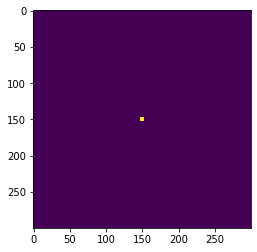

In [290]:
plt.imshow(count_neighbors_on_fire * np.random.random(state.shape) > 0.5 * fuel)

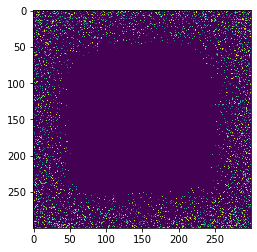

In [300]:
import scipy.signal
#kernel = np.array([[1,1,1],[1,0,1],[1,1,1]])
kernel5by5 = 15 *gkern()
kernel5by5[2,2] = 0

burn_rate = 5
N_STEPS = 300
state = np.zeros_like(fuel)
ignite(state)
states_history = np.zeros((N_STEPS,*state.shape))
ignitions_history = np.zeros((N_STEPS,*state.shape))
for i in range(N_STEPS):

    states_history[i] = state
    
    # calculate new ignitons
    count_neighbors_on_fire = scipy.signal.convolve2d(state, kernel5by5, 'same')
    ignitions = (count_neighbors_on_fire * np.random.random(state.shape) > 0.5) * fuel
    state += ignitions
    
    ignitions_history[i] = ignitions

    #update fuel status
    on_fire_mask = state > 0
    burned_out_mask = fuel < burn_rate
    fuel[on_fire_mask] -= burn_rate 
    fuel[burned_out_mask] = 0
    state[burned_out_mask] = 0
plt.imshow(states_history[100])